# DNA Origami Coloring Algorithm
Algorithm to compute the minimum number of DNA-frame + voxel objects needed to create a desired lattice structure.

Written by Sarah Hong, adapted from Jason Kahn

In [1]:
# For reading/writing lattice from file
import os
import sys
import numpy as np # The backbone of this program

# vispy imports
import vispy
vispy.use('PyQt5')
from vispy import app, scene
from vispy.color import Color

# My imports
from visualizations.LatticeCreator import LatticeCreatorGUI
from visualizations.LatticeVisualizer import LatticeVisualizer
from algorithm.Voxel import Voxel
from algorithm.Lattice import Lattice
from algorithm.Surroundings import SurroundingsManager
from algorithm.Symmetry import SymmetryManager

In [3]:
%gui tk

lc_gui = LatticeCreatorGUI()
input_lattice, isUnitCell = lc_gui.run()

print("The final lattice is:")
print(input_lattice)
print("Is it a unit cell? ", isUnitCell)

if input_lattice is not None:
    np.save("lattice.npy", input_lattice)

The final lattice is:
[[[1. 1. 1.]
  [1. 0. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 0. 1.]
  [1. 1. 1.]]]
Is it a unit cell?  1


invalid command name "5213306304_click_animation"
    while executing
"5213306304_click_animation"
    ("after" script)


In [2]:
%gui qt

with open('lattice.npy', 'rb') as f:
    input_lattice = np.load(f)

print(input_lattice)

vis = LatticeVisualizer(input_lattice)
vis.run()

[[[1. 1. 1.]
  [1. 0. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 0. 1.]
  [1. 1. 1.]]]


In [6]:
input_lattice = np.load('lattice.npy')
lattice = Lattice(input_lattice)
sm = SurroundingsManager(lattice)

In [7]:
# %gui qt

# Visualize the FullSurroundings 
# (Not recommended for large designs, it's extremely slow even for simple ones)

# FS_vis = LatticeVisualizer(sm.FullSurroundings)
# FS_vis.run()

print(f'FullSurroundings:\n{sm.FullSurroundings}')
print(f'Shape: {sm.FullSurroundings.shape}')

FullSurroundings:
[[[1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]
  [0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]
  [0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]]

 [[1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]
  [0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]
  [0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]]

 [[1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]
  [0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]
  [0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]]]
Shape: (6, 6, 6)


In [8]:
# Get VoxelSurroundings for voxel at (0, 0, 0)

print(f'Original lattice: \n{lattice.MinDesign}\n')
voxel = lattice.voxels[0]
print(f'Voxel {voxel.index} has coordinates: {voxel.coordinates} in original lattice')

vox_surround = sm.getVoxelSurroundings(voxel)
VS_vis = LatticeVisualizer(vox_surround)
VS_vis.run()

print(f'Surrounding matrix for Voxel {voxel.index}:\n{vox_surround}')

Original lattice: 
[[[1. 1.]
  [1. 0.]]

 [[0. 0.]
  [0. 1.]]]

Voxel 0 has coordinates: (0, 0, 0) in original lattice
Surrounding matrix for Voxel 0:
[[[1. 0. 1.]
  [0. 0. 0.]
  [1. 0. 1.]]

 [[0. 1. 0.]
  [1. 1. 1.]
  [0. 1. 0.]]

 [[1. 0. 1.]
  [0. 0. 0.]
  [1. 0. 1.]]]


## Test: SymmetryManager
Demonstrates example workflow, loading in an existing lattice from `lattice.npy`

In [10]:
from algorithm.Voxel import Voxel
from algorithm.Lattice import Lattice
from algorithm.Surroundings import SurroundingsManager
from algorithm.Symmetry import SymmetryManager

import numpy as np

print("SymmetryManager tests\n---\n")

input_lattice = np.load('lattice.npy')
print(f'Input lattice:\n{input_lattice}\n')

lattice = Lattice(input_lattice)
print(f'Min design:\n{lattice.MinDesign}\n')
print(f'Voxels:\n{lattice.voxels}\n')
print(f'Voxel indices:\n{[voxel.index for voxel in lattice.voxels]}\n')

surr_manager = SurroundingsManager(lattice)
print(f'Full surroundings:\n{surr_manager.FullSurroundings}\n')
print(f'VoxelSurroundings for voxel 0:\n{surr_manager.getVoxelSurroundings(lattice.voxels[0])}\n')
print(f'VoxelSurroundings for voxel 1:\n{surr_manager.getVoxelSurroundings(lattice.voxels[1])}\n')

sym_manager = SymmetryManager(lattice, surr_manager)
sym_manager.checkAllSymmetries()
df = sym_manager.makeSymmetryDf()

SymmetryManager tests
---

Input lattice:
[[[1. 1. 1.]
  [1. 0. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 0. 1.]
  [1. 1. 1.]]]

Min design:
[[[1. 1.]
  [1. 0.]]

 [[0. 0.]
  [0. 1.]]]

Voxels:
[<algorithm.Voxel.Voxel object at 0x289b3c800>, <algorithm.Voxel.Voxel object at 0x29df6deb0>, <algorithm.Voxel.Voxel object at 0x29df6cad0>, <algorithm.Voxel.Voxel object at 0x29df6d2e0>, <algorithm.Voxel.Voxel object at 0x29df6da00>, <algorithm.Voxel.Voxel object at 0x29df6ca10>, <algorithm.Voxel.Voxel object at 0x29df6ef30>, <algorithm.Voxel.Voxel object at 0x29df6e090>]

Voxel indices:
[0, 1, 2, 3, 4, 5, 6, 7]

Full surroundings:
[[[1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]
  [0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]
  [0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 1. 0. 1.]]

 [[1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 0. 1. 0.]
  [1. 1. 1. 1. 1. 1

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
# Tests 2
from algorithm.Voxel import Voxel
from algorithm.Lattice import Lattice
from algorithm.Surroundings import SurroundingsManager
from algorithm.Symmetry2 import SymmetryDf

import numpy as np
import pandas as pd

print("SymmetryManager tests\n---\n")

input_lattice = np.load('lattice.npy')
print(f'Input lattice:\n{input_lattice}\n')

lattice = Lattice(input_lattice)
print(f'Min design:\n{lattice.MinDesign}\n')
print(f'VoxelDict:\n{lattice.VoxelDict}\n')

voxel_dict = pd.DataFrame.from_dict(lattice.VoxelDict, orient='index')

print(f'Voxel obj coordinates:\n{[voxel.coordinates for voxel in lattice.VoxelDict.values()]}\n')
print(f'\nVoxel obj indices:\n{[voxel.index for voxel in lattice.VoxelDict.values()]}\n')

surr_manager = SurroundingsManager(lattice)
print(f'Full surroundings:\n{surr_manager.FullSurroundings}\n')
# print(f'VoxelSurroundings for voxel 0:\n{surr_manager.getVoxelSurroundings(lattice.voxels[0])}\n')
# print(f'VoxelSurroundings for voxel 1:\n{surr_manager.getVoxelSurroundings(lattice.voxels[1])}\n')

sym_manager = SymmetryDf(lattice, surr_manager)
sym_manager.compute_all_symmetries()
df = sym_manager.symmetry_df
df

SymmetryManager tests
---

Input lattice:
[[[1. 1. 1.]
  [1. 0. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 0. 1.]
  [1. 1. 1.]]]

Voxel 0 at np_coords: (0, 0, 0), coords: [0 1 1] has material 1.0
Voxel 1 at np_coords: (0, 0, 1), coords: [1 1 1] has material 1.0
Voxel 2 at np_coords: (0, 1, 0), coords: [0 0 1] has material 1.0
Voxel 3 at np_coords: (0, 1, 1), coords: [1 0 1] has material 0.0
Voxel 4 at np_coords: (1, 0, 0), coords: [0 1 0] has material 0.0
Voxel 5 at np_coords: (1, 0, 1), coords: [1 1 0] has material 0.0
Voxel 6 at np_coords: (1, 1, 0), coords: [0 0 0] has material 0.0
Voxel 7 at np_coords: (1, 1, 1), coords: [1 0 0] has material 1.0
Min design:
[[[1. 1.]
  [1. 0.]]

 [[0. 0.]
  [0. 1.]]]

VoxelDict:
{b'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00': <algorithm.Voxel.Voxel object at 0x10771b350>, b'\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x0

,translation,90° X-axis,180° X-axis,270° X-axis,90° Y-axis,180° Y-axis,270° Y-axis,90° Z-axis,180° Z-axis,270° Z-axis,...,90° X-axis + 270° Z-axis,90° X-axis + 90° Y-axis,90° X-axis + 90° Z-axis,90° Y-axis + 180° X-axis,90° Y-axis + 270° Z-axis,90° Z-axis + 180° X-axis,90° Z-axis + 180° Y-axis,90° Z-axis + 270° X-axis,90° Z-axis + 270° Y-axis,90° Z-axis + 90° Y-axis
"(1, 4)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"(4, 6)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"(2, 3)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"(2, 6)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"(4, 5)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"(0, 5)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
(1),True,False,True,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
"(3, 4)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"(0, 6)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"(1, 7)",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## SYMLIST!!!!
## AND SYMDICT!!!!!!! 😆

In [5]:
voxel_pair = frozenset({1, 2})
print(sym_manager.symlist(voxel_pair))

coord = np.array([0,0,1])
voxel = lattice.VoxelDict[coord.tobytes()]
sym_manager.symdict(voxel)

[]


{frozenset({2}): ['translation', '180° X-axis', '180° Y-axis', '180° Z-axis'],
 frozenset({2, 4}): ['90° Z-axis', '270° Z-axis']}

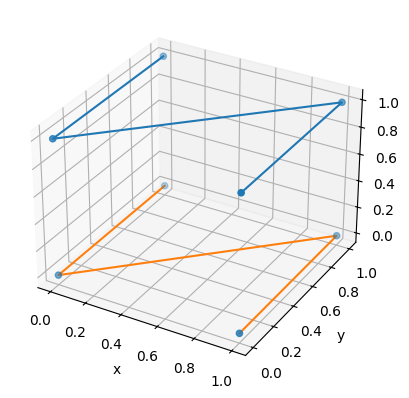

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

coordinates_list = [voxel.coordinates for voxel in lattice.VoxelDict.values()]

# Group coordinates by Z value
z_groups = {}
for x, y, z in coordinates_list:
    if z not in z_groups:
        z_groups[z] = []
    z_groups[z].append((x, y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter plot of all points
ax.scatter(*zip(*coordinates_list))

# For each Z level, sort the (x, y) tuples and connect them with lines
for z, xy_tuples in z_groups.items():
    # Sort or organize your (x, y) tuples if necessary
    # Example: sorted by x values
    sorted_xy = sorted(xy_tuples, key=lambda tup: tup[0])
    x_vals, y_vals = zip(*sorted_xy)
    z_vals = [z] * len(x_vals)
    
    # Plot lines
    ax.plot(x_vals, y_vals, z_vals)

# Labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Testing getPartner() functions
Yayayay i think it works

In [22]:
voxel_dict

coord = np.array([1,1,0])
voxel = lattice.VoxelDict[coord.tobytes()]

direction = np.array([1,0,0])
partner = lattice.getPartner(voxel, direction)
print(f'voxel coords: {partner[0].coordinates}')
print(f'vertex coords: {partner[1].coordinates}')

voxel coords: [0 1 0]
vertex coords: [-1  0  0]


In [3]:
%gui qt
from visualizations.LatticeVisualizer import LatticeVisualizer

LV = LatticeVisualizer(input_lattice)
LV.run()

In [4]:
import numpy as np

m = np.array([[[0, 1],
               [2, 3]],
              [[4, 5],
               [6, 7]]])
np.rot90(m, 1, axes=(1, 2))

array([[[1, 3],
        [0, 2]],

       [[5, 7],
        [4, 6]]])